## Curva de Laffer: Una introducción con Julia
                   Autor: Kamal A. Romero S.         
                   Contacto: karomero@ucm.es 

A cotinuación se deriva una curva de Laffer para un impuesto al trabajo. Partimos de un mercado de trabajo clásico muy básico. 

### Entorno

Del lado de la demanda empleamos una función Cobb-Douglas estándar

$Y=AK^{\frac{1}{3}}N^{\frac{2}{3}}$

obteniendo una demanda de trabajo convencional

$DN=\bigg(\frac{2}{3}\frac{A}{w}\bigg)^3K$

Del lado de la oferta usamos una función de utilidad simple

$U=\frac{c^\gamma}{\gamma}-N$

sujeta a la restricción de presupuesto

$C=(1-\tau_l)wN$

a partir de la cual se obtiene la siguiente función de oferta de trabajo

$ON=[(1-\tau_l)w]^{(\frac{\gamma}{1-\gamma})}$

Un incremento en el impuesto al trabajo $\tau_l$ reduce la oferta de trabajo y por ende, la producción de la economía.


Para determinar el salario y empelo de equilibrio igualamos oferta y demanda

$\bigg(\frac{2}{3}\frac{A}{w}\bigg)^3K=[(1-\tau_l)w]^{\frac{\gamma}{1-\gamma}}$

Asumiendo que $\gamma=0,5$ el salario de equilibrio viene dado por

$w=\bigg[ \bigg(\frac{2}{3}A\bigg)^3\frac{K}{1-\tau_l} \bigg]^{\frac{1}{4}}$

Al aumentar el impuesto al trabajo $\tau_l$ cae la oferta de trabajo y sube el salario de equilibrio a la vez que disminuye el nivel de empleo.


La recaudación viene dada por el tipo impositivo $\tau_l$ multiplicado por el total de rentas salariales $W\times N$

$\tau_l \times W \times N$


### Construyendo una Curva de Laffer

### Cargamos las librerías

In [1]:
using Roots
using PyPlot

Asignamos valores a $A=1$, $K=400$, $\gamma=0.5$  y calculamos la recaudación para cada tipo $\tau$

### Parámetros

In [2]:
alfa  = 1/3;  #participación del capital en la función de producción
K = 400;      #Stock de capital
A = 1;        #Productividad total de los factores TFP
gammal = 0.5; #Elasticidad de sustitución


### Definimos las funciones a utilizar

Primero definimos una serie de funciones necesarias para el cálculo

Función de producción

In [3]:
Y = (alfa,A,K,N) -> ( A*(K^alfa)*(N^(1-alfa)) ); 

Demanda de Trabajo

In [4]:
DT = (alfa,A,w,K) -> ( (((1-alfa)*(A/w))^3)*K );  

Oferta de Trabajo

In [5]:
OT = (tl,w,gammal) -> ( ((1-tl)*w)^(gammal/(1-gammal)) );  

Exceso de demanda. Posteriormente pasamos esta función a un solver no lineal para encontrar el salario de equilibrio

In [6]:
EDt = (alfa,A,w,K,tl,gammal) -> (DT(alfa,A,w,K) - OT(tl,w,gammal)); 

### Vector de impuestos

In [7]:
t = 0.00:0.01:0.99;
N = length(t);

### Inicializamos la tabla a rellenar

In [8]:
Tabla = zeros(N,5);

Hacemos un bucle que genera los datos de recaudación, empleo, salario y producción para cada tipo t

In [9]:
for i = 1:N
    Tabla[i,1]= t[i];
    ff = (w) -> EDt(alfa,A,w,K,t[i],gammal);
    ww = fzero(ff,0.1,20);
    Tabla[i,2] = ww;
    N = DT(alfa,A,ww,K);
    Tabla[i,3] =N;
    Tabla[i,4] = t[i]*ww*N;
    Tabla[i,5] = Y(alfa,A,K,N);     
end

### Gráficos

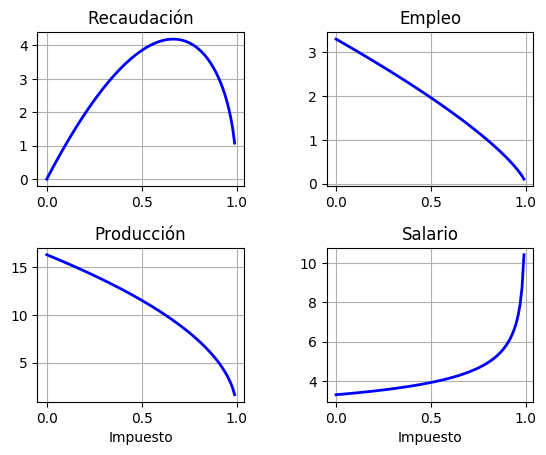

PyObject Text(0.5,24,'Impuesto')

In [11]:
fig, ax = subplots(2,2)
subplots_adjust(hspace=0.4,wspace=0.4)
ax[1,1][:plot](Tabla[:,1], Tabla[:,4], color="blue", linewidth=2, linestyle="-")
ax[1,1][:grid](true)
ax[1,1][:set_title]("Recaudación")
ax[1,2][:plot](Tabla[:,1], Tabla[:,3], color="blue", linewidth=2, linestyle="-")
ax[1,2][:grid](true)
ax[1,2][:set_title]("Empleo")
ax[2,1][:plot](Tabla[:,1], Tabla[:,5], color="blue", linewidth=2, linestyle="-")
ax[2,1][:grid](true)
ax[2,1][:set_title]("Producción")
ax[2,1][:set_xlabel]("Impuesto")
ax[2,2][:plot](Tabla[:,1], Tabla[:,2], color="blue", linewidth=2, linestyle="-")
ax[2,2][:grid](true)
ax[2,2][:set_title]("Salario")
ax[2,2][:set_xlabel]("Impuesto")